In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_to_csv= '/content/drive/MyDrive/Colab Notebooks/tested.csv'

df = pd.read_csv(path_to_csv)

In [4]:
# Initialize an empty dictionary to store label encoders for each categorical column
label_encoder_dict = dict()

# Loop through each column in the DataFrame
for col in df.columns:
    # Check if the column data type is 'object' (indicating it's categorical)
    if df[col].dtype == 'object':
        # Create a new LabelEncoder instance for this column
        label_encoder_dict[col] = LabelEncoder()
        # Fit the label encoder to the column and transform the values to numerical labels
        df[col] = label_encoder_dict[col].fit_transform(df[col])

# Print a message to indicate that the dataset has been encoded
print("Encoded Titanic Dataset:")

# Display the first few rows of the DataFrame to see the result of encoding
print(df.head())


Encoded Titanic Dataset:
   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0          892         0       3   206    1  34.5      0      0     152   
1          893         1       3   403    0  47.0      1      0     221   
2          894         0       2   269    1  62.0      0      0      73   
3          895         0       3   408    1  27.0      0      0     147   
4          896         1       3   178    0  22.0      1      1     138   

      Fare  Cabin  Embarked  
0   7.8292     76         1  
1   7.0000     76         2  
2   9.6875     76         1  
3   8.6625     76         2  
4  12.2875     76         2  


In [5]:
# Define the target variable 'y' as the 'Survived' column from the DataFrame
y = df['Survived']

# Define the feature matrix 'X' by dropping the 'Survived' column from the DataFrame
X = df.drop(['Survived'], axis=1)



In [6]:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
# Create the decision tree classifier (using ID3, criterion='entropy')
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, Y_train)


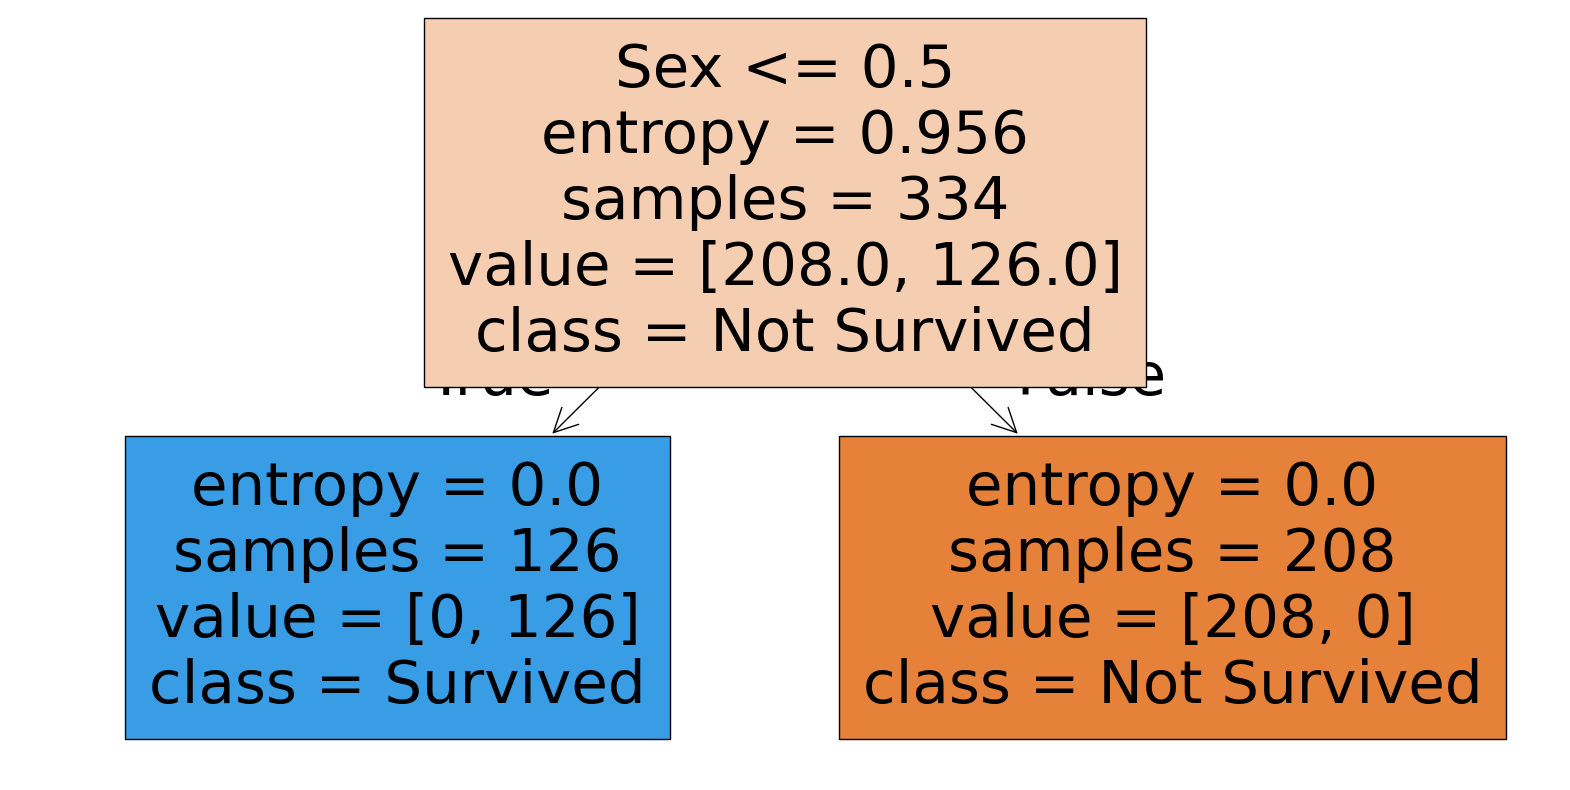

In [8]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

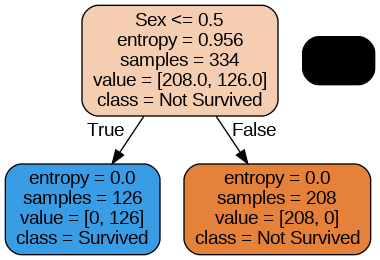

In [9]:
# Export tree visualization using graphviz
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns,
                class_names=['Not Survived', 'Survived'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [10]:
# Predict the training data
Y_train_pred = clf.predict(X_train)


In [11]:
# Evaluate accuracy on the training set
print("Accuracy on training set (in %):", metrics.accuracy_score(Y_train, Y_train_pred) * 100)


Accuracy on training set (in %): 100.0


In [12]:
# Predict the test data
Y_test_pred = clf.predict(X_test)

In [13]:
# Evaluate accuracy on the test set
print("Accuracy on testing set (in %):", metrics.accuracy_score(Y_test, Y_test_pred) * 100)

Accuracy on testing set (in %): 100.0


In [14]:
#  Compute the accuracy of the model (already partially done)
# Accuracy on the training set
train_accuracy = metrics.accuracy_score(Y_train, Y_train_pred) * 100
print("Accuracy on training set (in %):", train_accuracy)

Accuracy on training set (in %): 100.0


In [15]:
# Step 8: Implement CART (Decision Tree with criterion='gini')
cart_clf = tree.DecisionTreeClassifier(criterion='gini')
cart_clf = cart_clf.fit(X_train, Y_train)

In [16]:
# Predict the training data using CART
Y_train_pred_cart = cart_clf.predict(X_train)


In [17]:
# Predict the test data using CART
Y_test_pred_cart = cart_clf.predict(X_test)

In [18]:
# Evaluate accuracy for CART
cart_train_accuracy = metrics.accuracy_score(Y_train, Y_train_pred_cart) * 100
cart_test_accuracy = metrics.accuracy_score(Y_test, Y_test_pred_cart) * 100
print("CART Accuracy on training set (in %):", cart_train_accuracy)
print("CART Accuracy on testing set (in %):", cart_test_accuracy)

CART Accuracy on training set (in %): 100.0
CART Accuracy on testing set (in %): 100.0


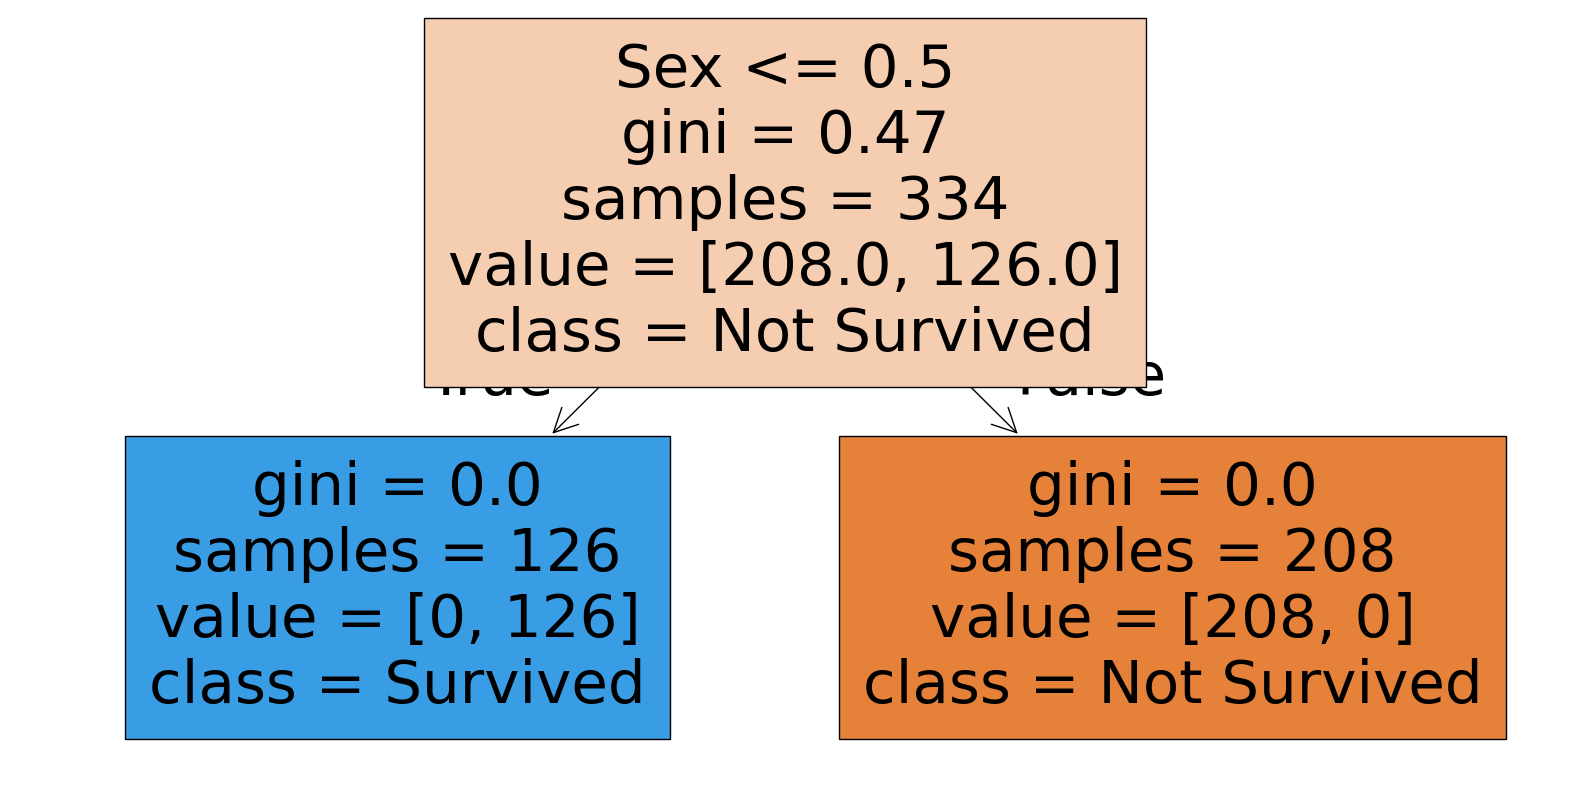

In [19]:
# Step 9: Visualize the CART decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(cart_clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

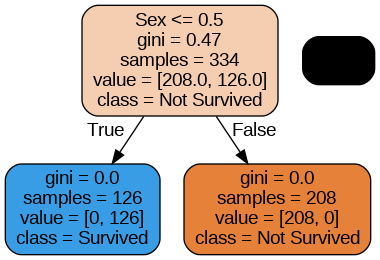

In [20]:
# Export CART tree visualization using graphviz
dot_data_cart = StringIO()
export_graphviz(cart_clf, out_file=dot_data_cart, filled=True, rounded=True,
                feature_names=X.columns,
                class_names=['Not Survived', 'Survived'])

graph_cart = pydotplus.graph_from_dot_data(dot_data_cart.getvalue())
Image(graph_cart.create_png())

In [21]:
# Encode categorical features
label_encoder_dict = {}
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder_dict[col] = LabelEncoder()
        df[col] = label_encoder_dict[col].fit_transform(df[col])



In [48]:
# Check for missing values and handle them (optional, depending on the dataset)
print(df.isnull().sum())  # Check for any missing values in the dataset
df = df.dropna()  # Remove rows with missing values (you can alternatively use df.fillna() to fill missing values)


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64


In [22]:
# Define target variable (Y) and predictors (X)
Y = df['Survived']
X = df.drop(['Survived'], axis=1)

In [52]:
# Ensure X and Y have the same index before splitting
X = X.loc[Y.index] # This aligns the index of X with Y, ensuring consistent samples


In [53]:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [54]:
# Print the shape of X_train and Y_train to ensure they match
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")


X_train shape: (292, 11)
Y_train shape: (292,)


In [55]:
# Helper function to train and evaluate Random Forest models with different numbers of trees
def train_and_evaluate(n_trees):
    # Initialize and train the Random Forest model using the CART algorithm (Gini impurity as the criterion)
    # The 'gini' criterion is used by default in RandomForestClassifier and is based on the CART algorithm.
    model = RandomForestClassifier(n_estimators=n_trees, criterion='gini', random_state=42) # Removed extra indent
    model.fit(X_train, Y_train) # Removed extra indent

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(Y_test, Y_pred) * 100 # Fixed: Removed extra indentation
    print(f"Accuracy with {n_trees} trees (using CART algorithm): {accuracy:.2f}%")
    return model, accuracy




In [56]:
 #Train models with 10, 100, and 500 trees using the CART algorithm
model_10, accuracy_10 = train_and_evaluate(10)
model_100, accuracy_100 = train_and_evaluate(100)
model_500, accuracy_500 = train_and_evaluate(500)


Accuracy with 10 trees (using CART algorithm): 100.00%
Accuracy with 100 trees (using CART algorithm): 100.00%
Accuracy with 500 trees (using CART algorithm): 100.00%


In [57]:
# Compare the results
print("\nComparison of accuracies:")
print(f"10 trees : {accuracy_10:.2f}%")
print(f"100 trees : {accuracy_100:.2f}%")
print(f"500 trees : {accuracy_500:.2f}%")


Comparison of accuracies:
10 trees : 100.00%
100 trees : 100.00%
500 trees : 100.00%


In [58]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for the model with 100 trees
cross_val_accuracy = cross_val_score(model_100, X, y, cv=5)
print("Cross-Validation Accuracy:", cross_val_accuracy.mean())

Cross-Validation Accuracy: 1.0


In [ ]:
#If the cross-validation accuracy is also 1.0, it suggests that the model is achieving perfect predictions consistently across different folds

In [31]:
# 1. Feature Importance

# Get the feature importances from the trained model (model_100)
# The Random Forest model has an attribute '.feature_importances_' that returns an array
# of importance scores for each feature in the dataset.
feature_importances = model_100.feature_importances_

# Get the feature names (columns) from the dataset (X), which contains the input features
features = X.columns

# Create a DataFrame to store feature names and their corresponding importance scores
# The DataFrame is then sorted in descending order based on the importance scores.
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)


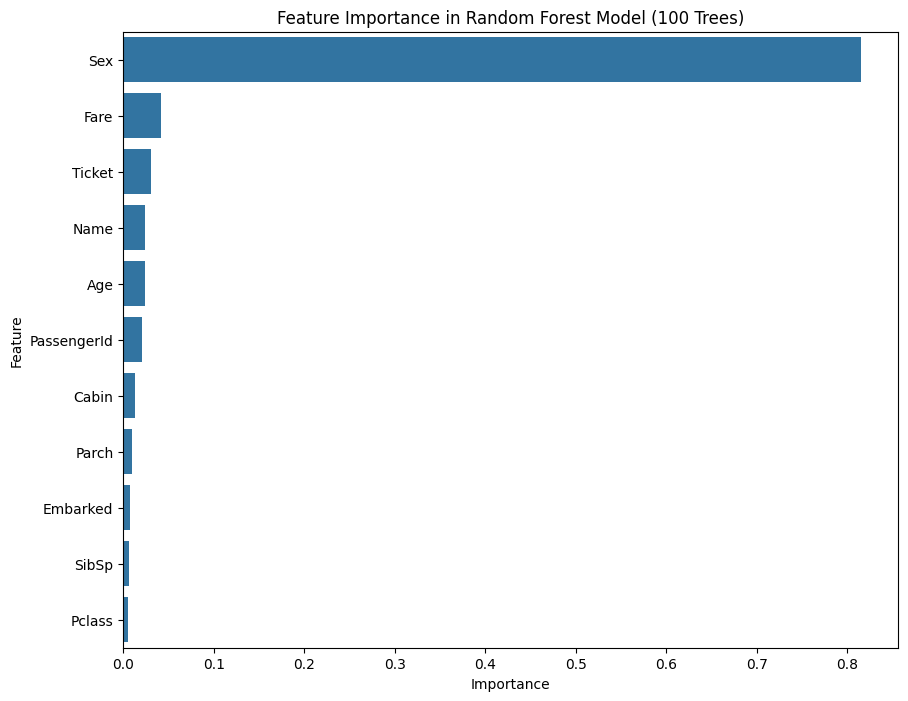

In [32]:
# Plot Feature Importance

# Create a figure for the bar plot with a specific size
plt.figure(figsize=(10, 8))

# Use seaborn's barplot to create a bar chart showing the importance of each feature
# 'Importance' is on the x-axis, and 'Feature' is on the y-axis
# The data comes from the 'importance_df' DataFrame, which contains features and their importance scores
sns.barplot(x='Importance', y='Feature', data=importance_df)

# Set the title of the plot to describe what is being shown
plt.title('Feature Importance in Random Forest Model (100 Trees)')

# Display the plot
plt.show()



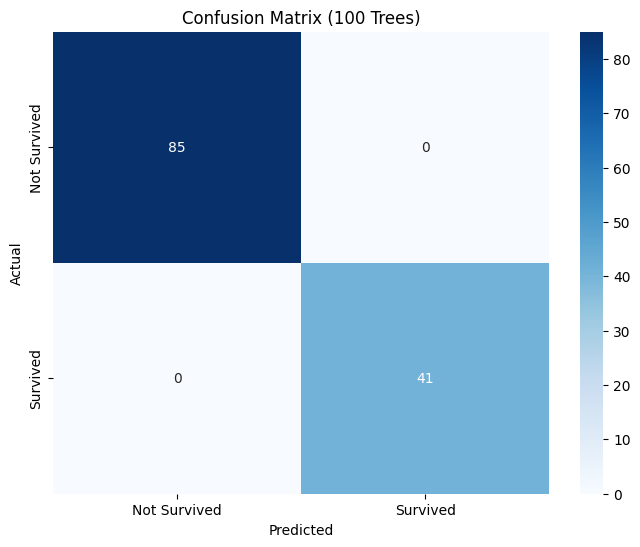

In [33]:
# 2. Confusion Matrix

# Generate the confusion matrix by comparing the actual values (Y_test) and predicted values from the model
conf_matrix = metrics.confusion_matrix(Y_test, model_100.predict(X_test))

# Create a figure for the confusion matrix with a specific size
plt.figure(figsize=(8, 6))

# Use seaborn's heatmap to visualize the confusion matrix
# - annot=True: Annotate the cells with numeric values
# - fmt='d': Display the annotations as integers
# - cmap='Blues': Use the 'Blues' colormap for the heatmap
# - xticklabels and yticklabels: Label the axes with 'Not Survived' and 'Survived'
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

# Set the title of the confusion matrix plot
plt.title('Confusion Matrix (100 Trees)')

# Label the x-axis as 'Predicted' (what the model predicted)
plt.xlabel('Predicted')

# Label the y-axis as 'Actual' (the true labels from the test data)
plt.ylabel('Actual')

# Display the confusion matrix plot
plt.show()


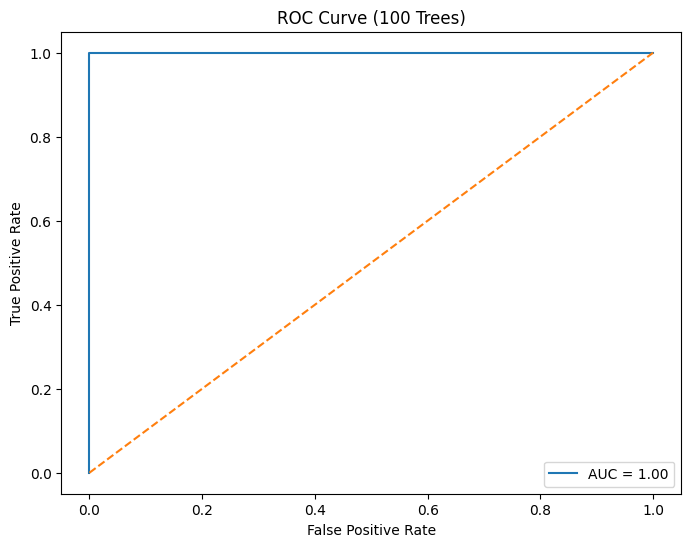

AUC Score (100 Trees): 1.00


In [34]:
# 3. ROC Curve and AUC Score

# Get predicted probabilities for the positive class (Survived)
Y_pred_proba = model_100.predict_proba(X_test)[::, 1]  # `[:, 1]` selects the probability for the positive class (Survived)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for different threshold values
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_proba)

# Compute the AUC (Area Under the Curve) score, which indicates the model's ability to distinguish between classes
auc_score = metrics.roc_auc_score(Y_test, Y_pred_proba)

# Create a plot for the ROC curve with a specified figure size
plt.figure(figsize=(8, 6))

# Plot the ROC curve (TPR vs FPR), and include a label for the AUC score
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc_score))

# Add a diagonal line representing random guessing (FPR = TPR)
plt.plot([0, 1], [0, 1], linestyle='--')  # This is the baseline (random guessing)

# Set labels for the x and y axes
plt.xlabel("False Positive Rate")  # X-axis represents FPR
plt.ylabel("True Positive Rate")   # Y-axis represents TPR

# Set the title of the plot
plt.title("ROC Curve (100 Trees)")

# Display the legend with the AUC score
plt.legend()

# Show the plot
plt.show()

# Print the AUC score to the console
print(f"AUC Score (100 Trees): {auc_score:.2f}")
